In [1]:
import pandas as pd 
import numpy as np 

In [2]:
data = pd.read_csv('dataset/fcc-forum-pageviews.csv')
data

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [3]:
data.isnull().sum()

date     0
value    0
dtype: int64

In [4]:
data['date'] = pd.to_datetime(data['date'])

In [5]:
data.set_index('date', inplace=True)

In [6]:
top_threshold = data.quantile(0.975)
bottom_threshold = data.quantile(0.025)

In [7]:
filtered_df = data[(data <= top_threshold) & (data >= bottom_threshold)]

In [8]:
filtered_df.dropna(inplace=True)

In [9]:
import matplotlib.pyplot as plt

C:\Users\ahmad\AppData\Local\Temp\ipykernel_115380\579082742.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


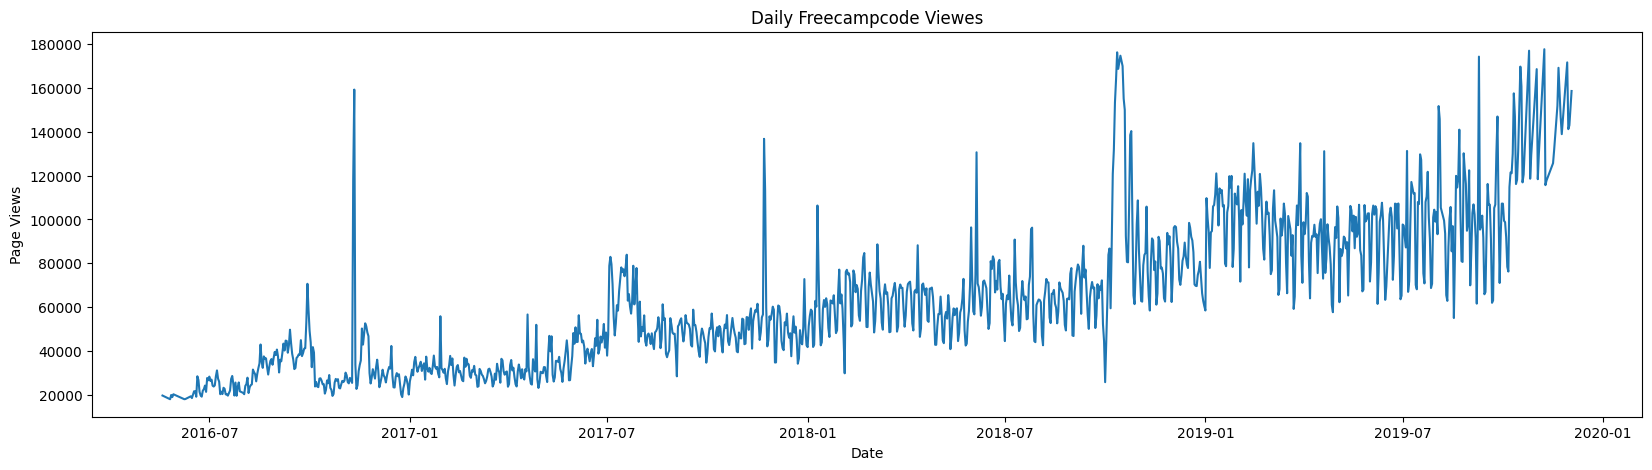

In [10]:
fig, ax = plt.subplots(figsize= (20,5))

ax.plot(filtered_df)
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily Freecampcode Viewes')



fig.show()

In [11]:
data

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [12]:
monthly_average = filtered_df.groupby([filtered_df.index.year, filtered_df.index.month]).mean()
monthly_average = monthly_average.rename_axis(['Year', 'Month'])
monthly_average.reset_index(inplace=True)

In [13]:
import calendar
monthly_average['Month'] = monthly_average['Month'].apply(lambda x: calendar.month_name[x])
monthly_average

,Year,Month,value
0,2016,May,19432.400000
1,2016,June,21875.105263
2,2016,July,24109.678571
3,2016,August,31049.193548
4,2016,September,41476.866667
5,2016,October,27398.322581
6,2016,November,40448.633333
7,2016,December,27832.419355
8,2017,January,32785.161290
9,2017,February,31113.071429


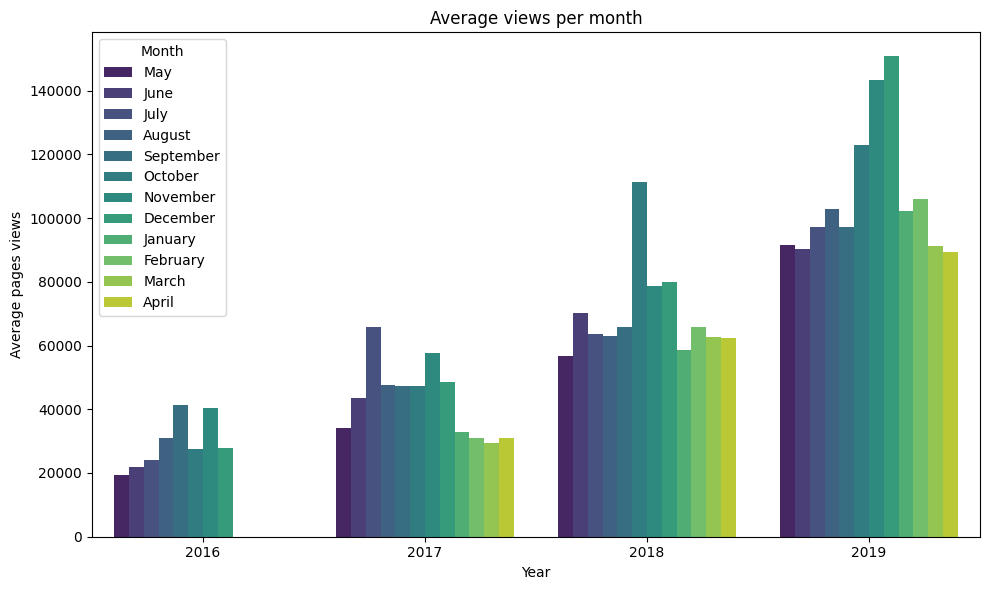

In [14]:
import seaborn as sns

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='value', hue='Month', data=monthly_average, palette='viridis')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average pages views')
plt.title('Average views per month')

plt.tight_layout()
plt.show()

In [15]:
filtered_df['Year'] = filtered_df.index.year
filtered_df['Month'] = filtered_df.index.month_name()
filtered_df

,value,Year,Month
date,,,
2016-05-19,19736.0,2016,May
2016-05-26,18060.0,2016,May
2016-05-27,19997.0,2016,May
2016-05-28,19044.0,2016,May
2016-05-29,20325.0,2016,May
...,...,...,...
2019-11-24,138875.0,2019,November
2019-11-29,171584.0,2019,November
2019-11-30,141161.0,2019,November


C:\Users\ahmad\AppData\Local\Temp\ipykernel_115380\620768641.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3[1].set_xticklabels(ax3[1].get_xticklabels(), rotation=45, ha='right')


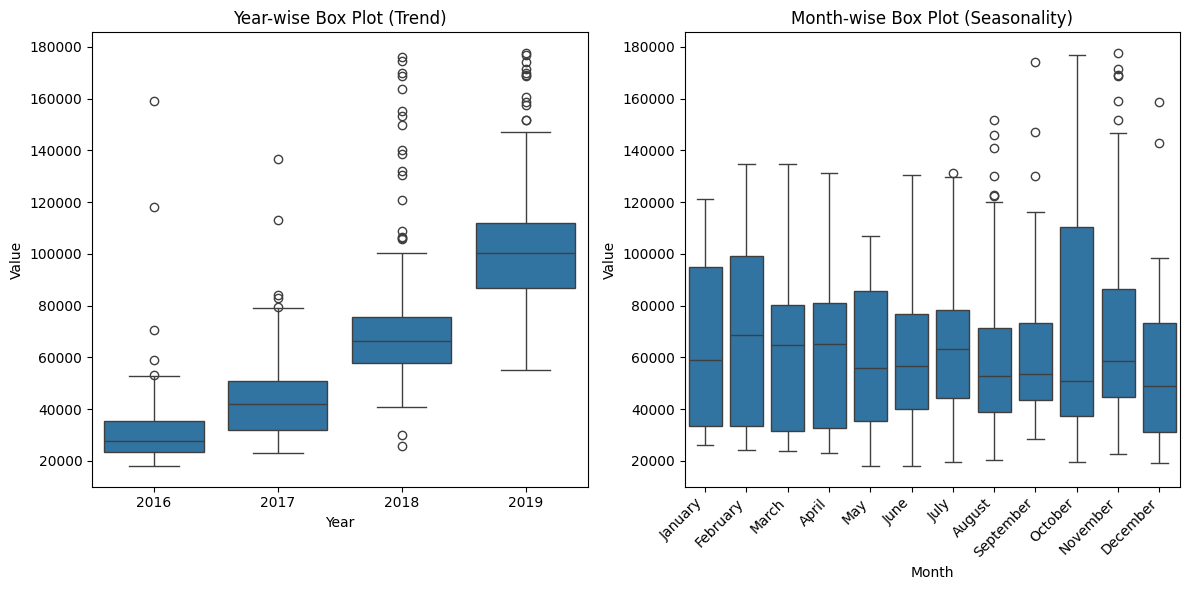

In [19]:
fig, ax3 = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x='Year', y='value', data=filtered_df, ax=ax3[0])
ax3[0].set_title('Year-wise Box Plot (Trend)')
ax3[0].set_xlabel('Year')
ax3[0].set_ylabel('Value')

sns.boxplot(x='Month', y='value', data=filtered_df, ax=ax3[1], order=calendar.month_name[1:])
ax3[1].set_title('Month-wise Box Plot (Seasonality)')
ax3[1].set_xlabel('Month')
ax3[1].set_ylabel('Value')
ax3[1].set_xticklabels(ax3[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()